## Amir Shokri
## St code : 9811920009
## E-mail : amirsh.nll@gmail.com

## K-Nearest Neighbour (KNN) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/Users/Amirsh.nll/Downloads/KNN-AmirShokri'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Amirsh.nll/Downloads/KNN-AmirShokri\genderclassifier.csv
/Users/Amirsh.nll/Downloads/KNN-AmirShokri\KNN.ipynb
/Users/Amirsh.nll/Downloads/KNN-AmirShokri\.ipynb_checkpoints\KNN-checkpoint.ipynb


In [2]:
data = pd.read_csv('genderclassifier.csv', encoding ='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [3]:
data = data.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'profile_yn', 'profile_yn:confidence', 'created', 'description', 'gender_gold', 'link_color', 'profile_yn_gold', 'profileimage', 'sidebar_color', 'text', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 'gender:confidence', 'gender', 'name'],axis=1)

In [4]:
data.head(20000)

,fav_number,retweet_count,tweet_count
0,0,0,110964
1,68,0,7471
2,7696,1,5617
3,202,0,1693
4,37318,0,31462
...,...,...,...
19995,33834,1,29190
19996,2462,0,11117
19997,1855,0,5640
19998,2160,0,2041


In [5]:
y = data['tweet_count'].values
y = y.reshape(-1,1)
x_data = data.drop(['tweet_count'],axis = 1)
print(x_data)

       fav_number  retweet_count
0               0              0
1              68              0
2            7696              1
3             202              0
4           37318              0
...           ...            ...
20045         302              0
20046        2513              0
20047          50              0
20048       70804              0
20049        3348              0

[20050 rows x 2 columns]


In [6]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head(20000)

,fav_number,retweet_count
0,0.000000,0.00000
1,0.000199,0.00000
2,0.022528,0.00303
3,0.000591,0.00000
4,0.109238,0.00000
...,...,...
19995,0.099040,0.00303
19996,0.007207,0.00000
19997,0.005430,0.00000
19998,0.006323,0.00000


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=100)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (10025, 2)
x_test:  (10025, 2)
y_train:  (10025, 1)
y_test:  (10025, 1)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
K = 1
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train.ravel())
print("When K = {} neighnors , KNN test accuracy: {}".format(K, knn.score(x_test, y_test)))
print("When K = {} neighnors , KNN train accuracy: {}".format(K, knn.score(x_train, y_train)))

When K = 1 neighnors , KNN test accuracy: 0.015561097256857856
When K = 1 neighnors , KNN train accuracy: 0.4479800498753117


In [9]:
ran = np.arange(1,30)
train_list = []
test_list = []
for i,each in enumerate(ran):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train, y_train.ravel())
    test_list.append(knn.score(x_test, y_test))
    train_list.append(knn.score(x_train, y_train))

Best test score is 0.015561097256857856 and K = 1
Best train score is 0.4479800498753117 and K = 1


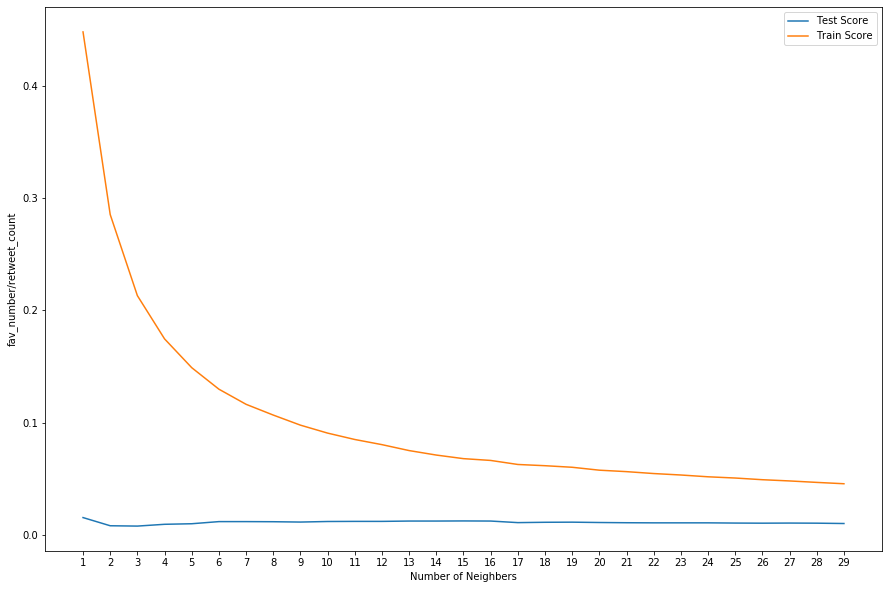

In [10]:
plt.figure(figsize=[15,10])
plt.plot(ran,test_list,label='Test Score')
plt.plot(ran,train_list,label = 'Train Score')
plt.xlabel('Number of Neighbers')
plt.ylabel('fav_number/retweet_count')
plt.xticks(ran)
plt.legend()
print("Best test score is {} and K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} and K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))